In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/Evaluation_Week1/loan_prediction.csv")
pd.set_option('display.max_rows', None)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [3]:
df.info()
#There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History     
#Will see if there any related columns where the information can be imported
#Loan Id would not add a significant information to the model so would drop it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#Droping Not required Columns
df=df.drop(columns=['Loan_ID'],axis=1)

In [5]:
df.describe()
# In Application Income and CoapplicantIncome columns, The Standard Deviation looks very high-But this might be a real income which would not be considered as error
#Loan Amount looks quite Okay
#Loan_Amount_Term-Looks quite okay with the descriptive statistical values
#Credit history is catogorical variable

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


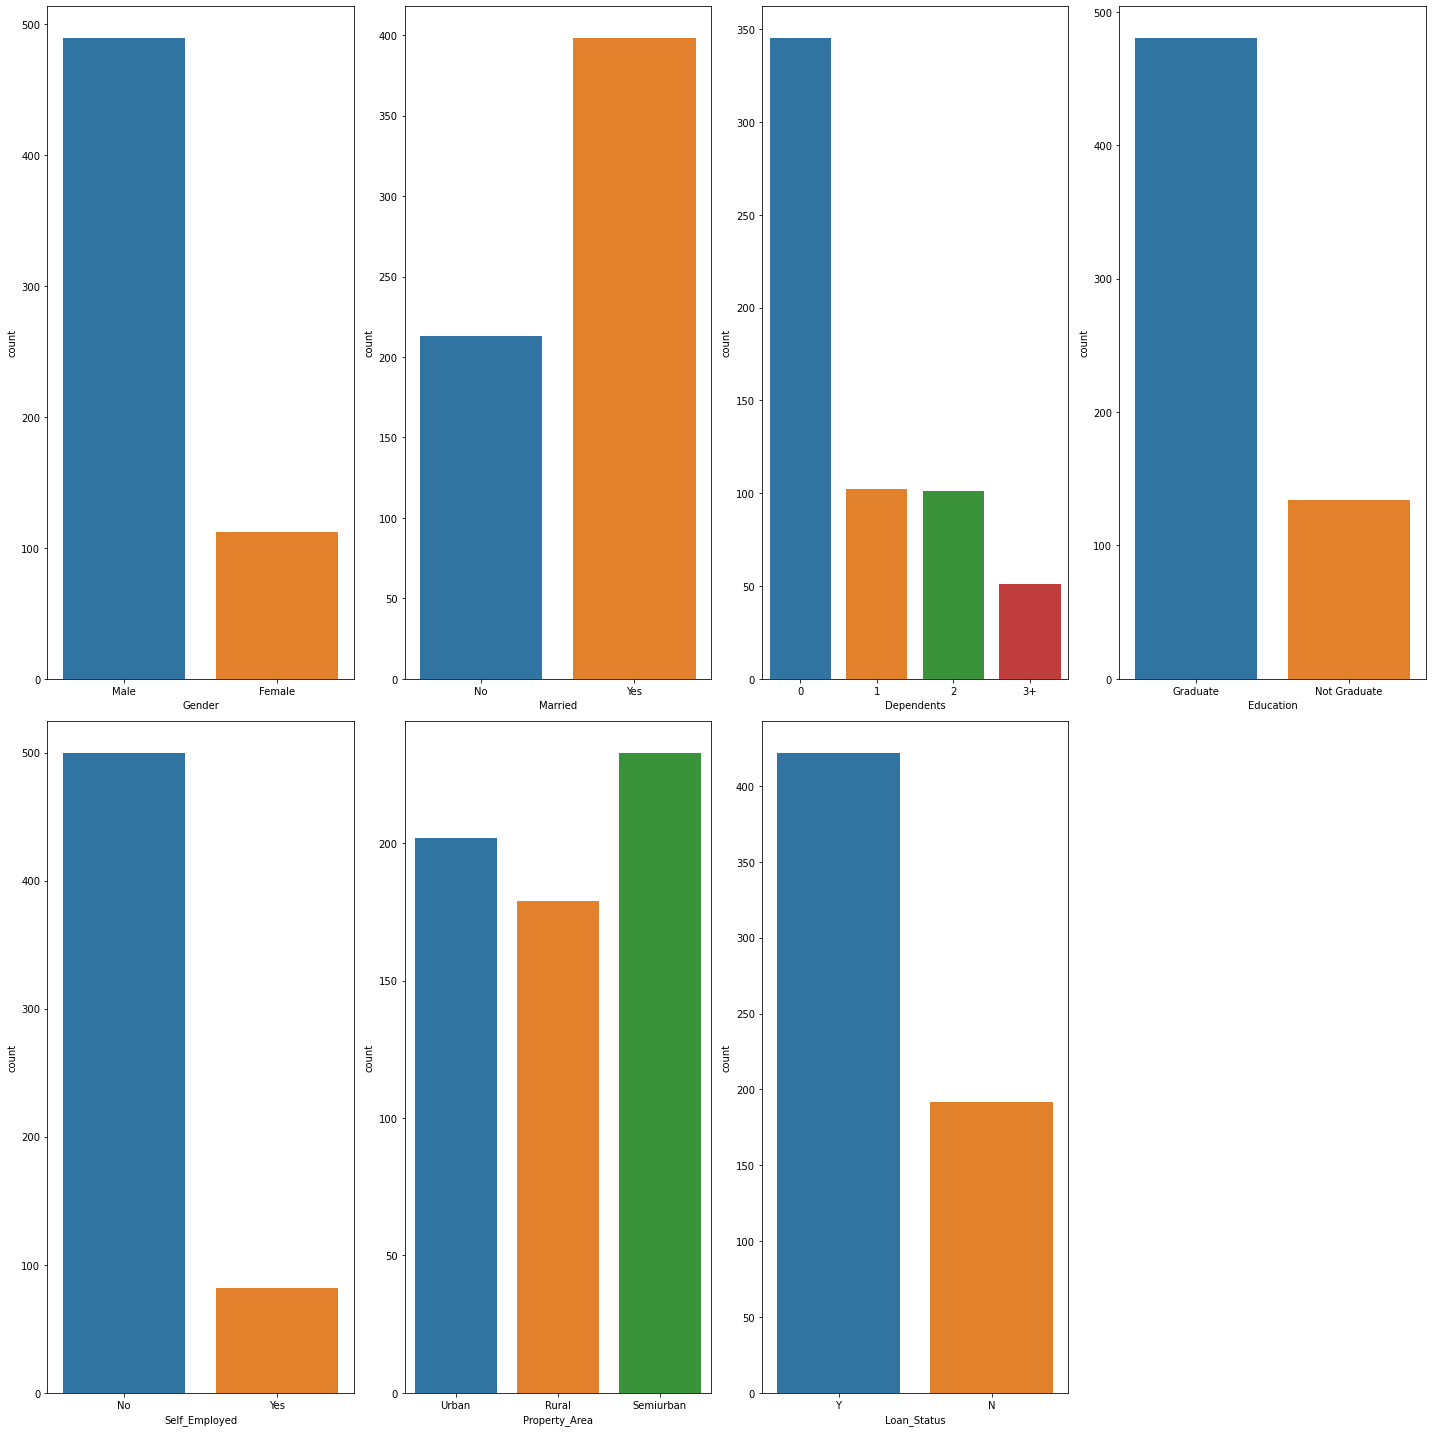

In [6]:
categorial_features = df.select_dtypes(include=[np.object])
#frequency of categories
for col in categorial_features:
    print(df[col].value_counts())
    
#Ploting the catogorical variables
#Checking the variables
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in categorial_features:
    if plotnumber<=12:
        ax=plt.subplot(2,4,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()  


In [7]:
categorial_features.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [8]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN, strategy="most_frequent" )

#Impute values for Columns
df.Gender=imp.fit_transform(df["Gender"].values.reshape(-1,1))[:,0]
df.Married=imp.fit_transform(df["Married"].values.reshape(-1,1))[:,0]
df.Dependents=imp.fit_transform(df["Dependents"].values.reshape(-1,1))[:,0]
df.Self_Employed=imp.fit_transform(df["Self_Employed"].values.reshape(-1,1))[:,0]

In [9]:
#Encoding Done
df['Gender']=df['Gender'].replace({'Male':1, 'Female':0})
df['Loan_Status']=df['Loan_Status'].replace({'Y':1, 'N':0})
df['Married']=df['Married'].replace({'Yes':1, 'No':0})
df['Dependents']=df['Dependents'].replace({'1':1, '2':2, '3+':3})
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1, 'No':0})

from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

df['Education']=LE.fit_transform(df['Education'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(2), int64(5), object(1)
memory usage: 52.9+ KB


In [11]:
df['Dependents']=df['Dependents'].astype('int64')

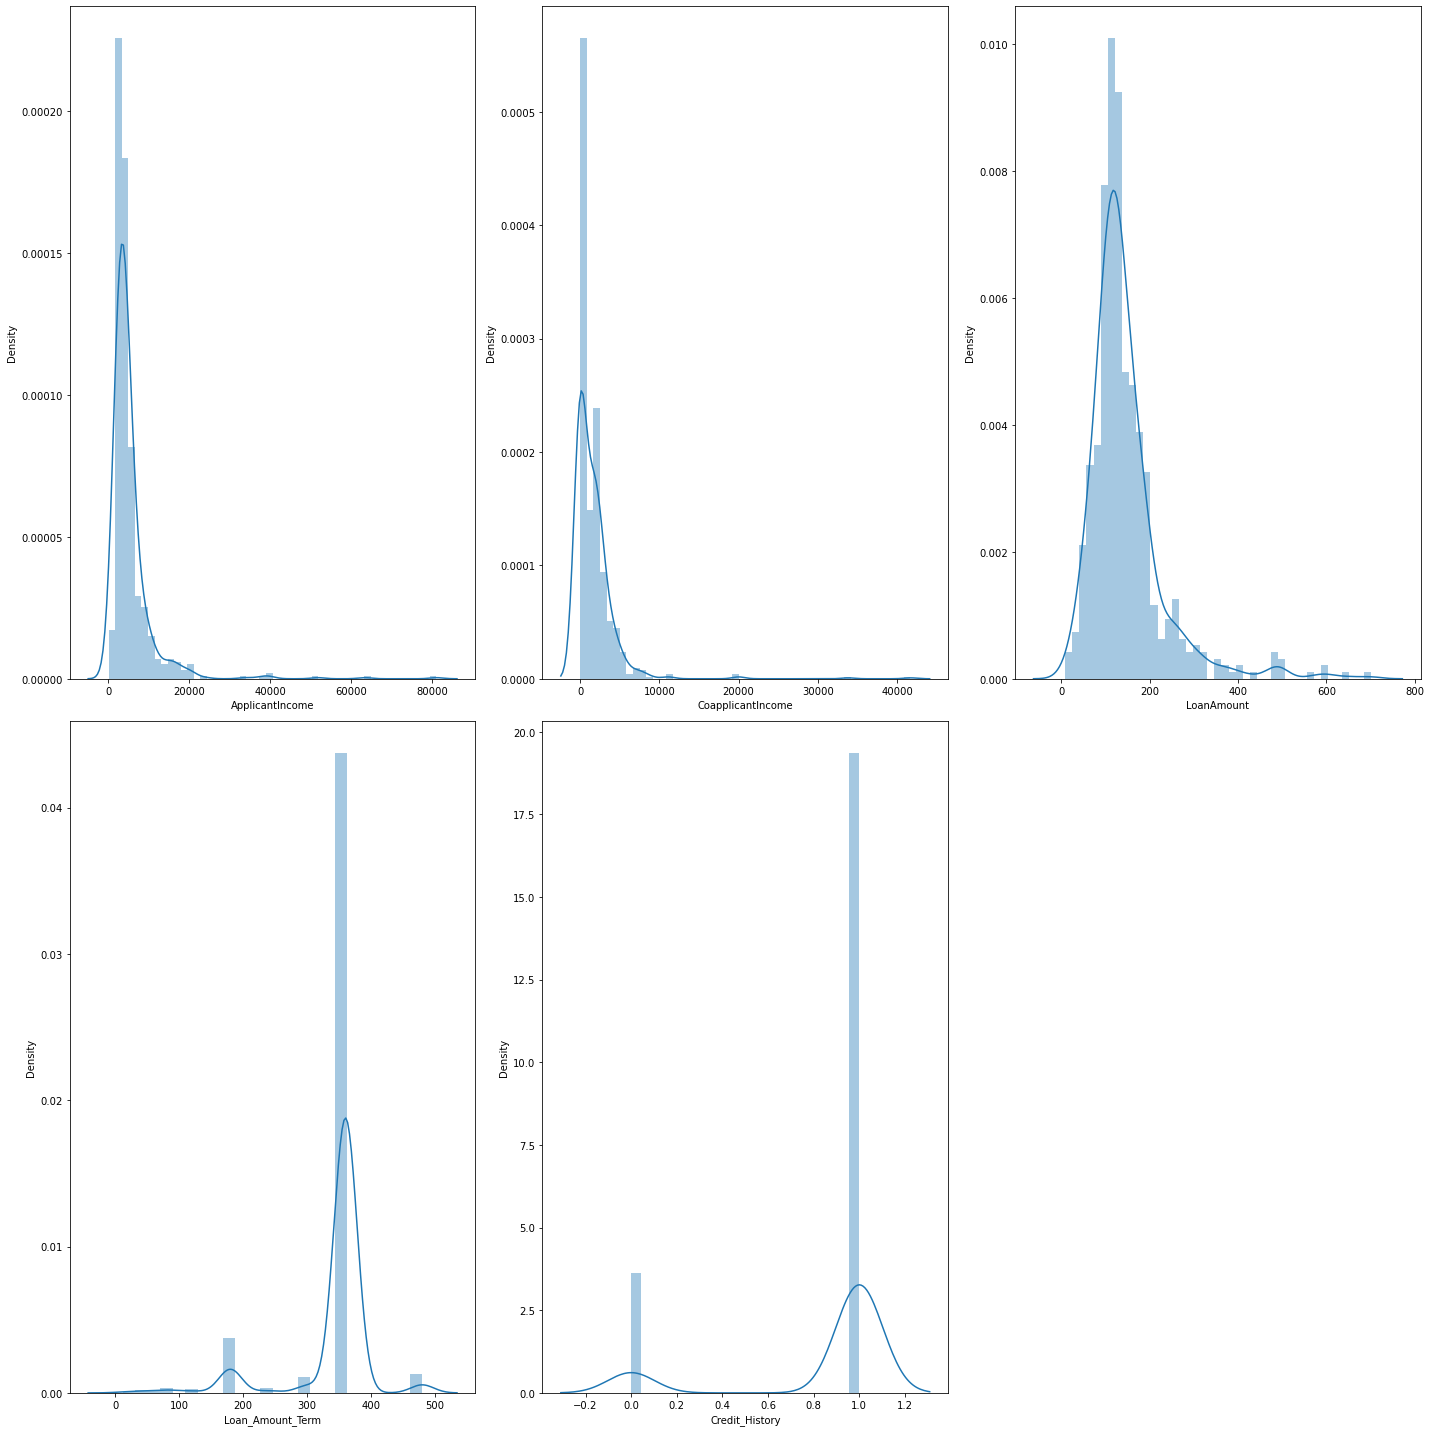

In [12]:
df['ApplicantIncome']=df['ApplicantIncome'].astype('float64')
Numerical_features = df.select_dtypes(include=[np.float64])


#Check How the data is distributed in numeriacal features
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in Numerical_features:
    if plotnumber<=12:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()  

In [13]:
Numerical_features.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [14]:
df.Loan_Amount_Term =imp.fit_transform(df["Loan_Amount_Term"].values.reshape(-1,1))[:,0]

The Screwness reduction by either Outliers or Zscore would remove High Income indivuals and low individual data, That would not be a very good to the model
Check if we can shange the scale of these parameters so that the data looks normalised

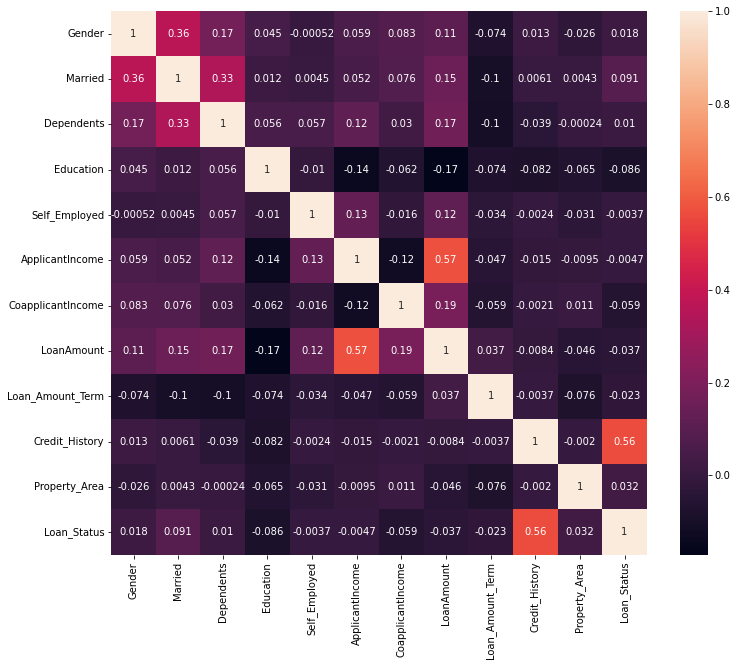

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.109520,-0.074030,0.013472,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.149743,-0.100912,0.006082,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.166106,-0.103864,-0.038702,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.171133,-0.073928,-0.081822,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.117421,-0.033739,-0.002362,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.570909,-0.046531,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.188619,-0.059383,-0.002056,0.010522,-0.059187
LoanAmount,0.109520,0.149743,0.166106,-0.171133,0.117421,0.570909,0.188619,1.000000,0.036981,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036981,1.000000,-0.003735,-0.076120,-0.022549
Credit_History,0.013472,0.006082,-0.038702,-0.081822,-0.002362,-0.014715,-0.002056,-0.008433,-0.003735,1.000000,-0.001969,0.561678


In [15]:
Corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(Corr,annot=True)
plt.show()
#Looks very less correlated, Applicated Income Vs Loan Amount; Loan Status Vs Credit history are slightly correlated; Lets check
Corr

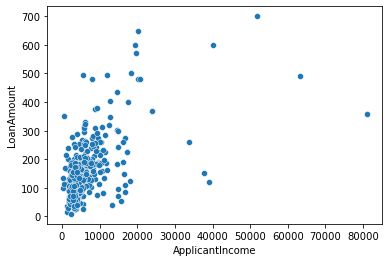

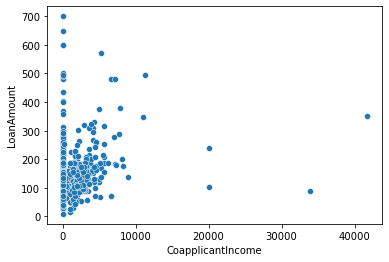

In [16]:
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'])
plt.show()

sns.scatterplot(df['CoapplicantIncome'],df['LoanAmount'])
plt.show()
#This Plot shows that low Application Income indivuals request Low Loan amount, based on this we will impute the missing data in Loan Amoun

  0 - 5000:  418
5000 - 10000:  141
10000 - 20000:   43
20000 - 30000:    5
30000 - 40000:    4
40000 - 50000:    0
50000 - 60000:    1
60000 - 70000:    1
70000 - 80000:    0


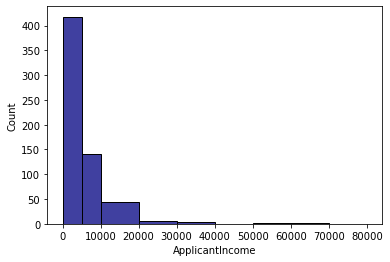

In [17]:
bins = [0,5000,10000,20000,30000,40000,50000,60000,70000,80000 ]
ax = sns.histplot(df['ApplicantIncome'], kde=False, bins=bins, color='navy')
for bar, b0, b1 in zip(ax.containers[0], bins[:-1], bins[1:]):
    print(f'{b0:3d} - {b1:3d}: {bar.get_height():4.0f}')

#By checking the bins for equal distribution will import the value

  0 - 150:  385
150 - 250:  154
250 - 350:   33
350 - 450:    8
450 - 550:    7
550 - 650:    3
650 - 750:    2
750 - 850:    0


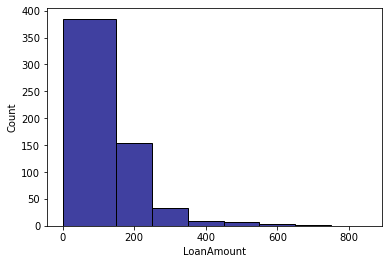

In [18]:
bins = [0,150,250,350,450,550,650,750,850]
ax = sns.histplot(df['LoanAmount'], kde=False, bins=bins, color='navy')
for bar, b0, b1 in zip(ax.containers[0], bins[:-1], bins[1:]):
    print(f'{b0:3d} - {b1:3d}: {bar.get_height():4.0f}')

In [19]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

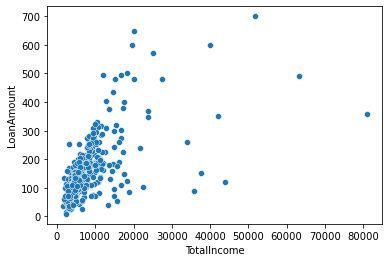

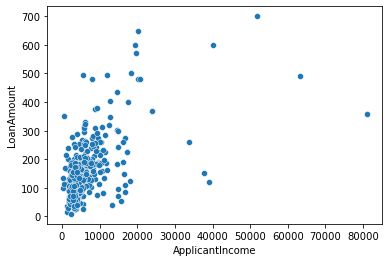

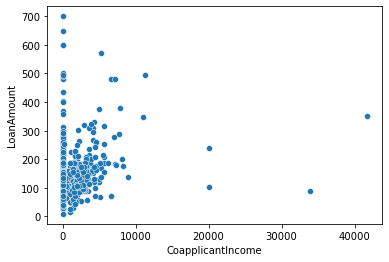

In [20]:
sns.scatterplot(df['TotalIncome'],df['LoanAmount'])
plt.show()
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'])
plt.show()
sns.scatterplot(df['CoapplicantIncome'],df['LoanAmount'])
plt.show()

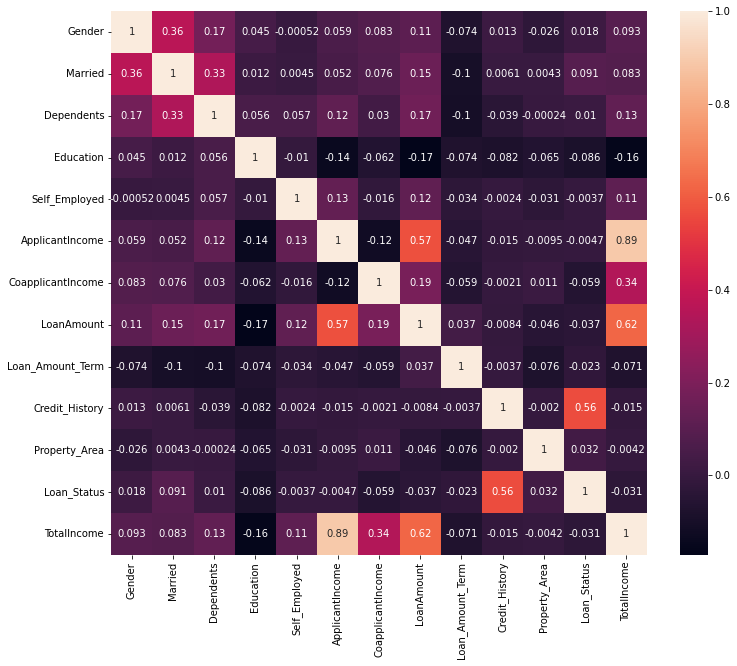

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.109520,-0.074030,0.013472,-0.025752,0.017987,0.093191
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.149743,-0.100912,0.006082,0.004257,0.091478,0.083319
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.166106,-0.103864,-0.038702,-0.000244,0.010118,0.125590
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.171133,-0.073928,-0.081822,-0.065243,-0.085884,-0.161362
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.117421,-0.033739,-0.002362,-0.030860,-0.003700,0.113000
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.570909,-0.046531,-0.014715,-0.009500,-0.004710,0.893037
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.188619,-0.059383,-0.002056,0.010522,-0.059187,0.342781
LoanAmount,0.109520,0.149743,0.166106,-0.171133,0.117421,0.570909,0.188619,1.000000,0.036981,-0.008433,-0.045792,-0.037318,0.624621
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036981,1.000000,-0.003735,-0.076120,-0.022549,-0.070917
Credit_History,0.013472,0.006082,-0.038702,-0.081822,-0.002362,-0.014715,-0.002056,-0.008433,-0.003735,1.000000,-0.001969,0.561678,-0.015109


In [21]:
Corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(Corr,annot=True)
plt.show()
#Looks very less correlated, Applicated Income Vs Loan Amount; Loan Status Vs Credit history are slightly correlated; Lets check
Corr

#This Approach was taken as we practically know that Loan approvals are based on Applicatant and Co applicant incomes

So Total Income is 0.62 Correlated and Application income is 0.57 correlated So would make bins with Total Income and impute Loan Amount

  0 - 5000:  267
5000 - 10000:  258
10000 - 20000:   71
20000 - 30000:    9
30000 - 40000:    4
40000 - 50000:    2
50000 - 60000:    1
60000 - 70000:    1
70000 - 80000:    0


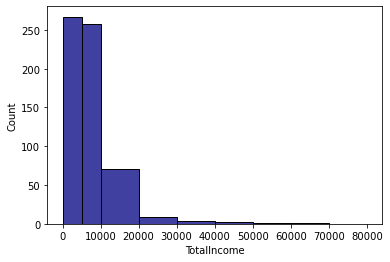

In [22]:
bins = [0,5000,10000,20000,30000,40000,50000,60000,70000,80000 ]
ax = sns.histplot(df['TotalIncome'], kde=False, bins=bins, color='navy')
for bar, b0, b1 in zip(ax.containers[0], bins[:-1], bins[1:]):
    print(f'{b0:3d} - {b1:3d}: {bar.get_height():4.0f}')

  0 - 125:  281
125 - 200:  226
200 - 300:   55
300 - 400:   15
400 - 500:    9
500 - 600:    2
600 - 700:    3
700 - 800:    1


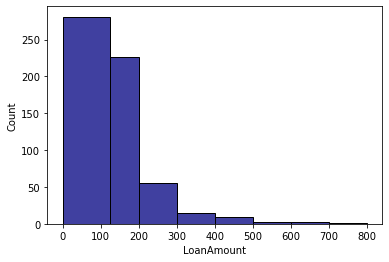

In [23]:
bins = [0,125,200,300,400,500,600,700,800]
ax = sns.histplot(df['LoanAmount'], kde=False, bins=bins, color='navy')
for bar, b0, b1 in zip(ax.containers[0], bins[:-1], bins[1:]):
    print(f'{b0:3d} - {b1:3d}: {bar.get_height():4.0f}')

Thses Histographs look similar

In [24]:
bins = [0,5000,10000,20000,30000,40000,50000,60000,70000,80000 ]
category = ['V','VL','L','M','H','VH','VVH','VVVH','VVVVH']
df['TotalIncome'] = pd.cut(df["TotalIncome"],bins,labels = category)

In [25]:
df['TotalIncome']=LE.fit_transform(df['TotalIncome'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,5849.0,0.000000,NaN,360.0,1.0,2,1,5
1,1,1,1,0,0,4583.0,1508.000000,128.0,360.0,1.0,0,0,5
2,1,1,0,0,1,3000.0,0.000000,66.0,360.0,1.0,2,1,3
3,1,1,0,1,0,2583.0,2358.000000,120.0,360.0,1.0,2,1,3
4,1,0,0,0,0,6000.0,0.000000,141.0,360.0,1.0,2,1,5
5,1,1,2,0,1,5417.0,4196.000000,267.0,360.0,1.0,2,1,5
6,1,1,0,1,0,2333.0,1516.000000,95.0,360.0,1.0,2,1,3
7,1,1,3,0,0,3036.0,2504.000000,158.0,360.0,0.0,1,0,5
8,1,1,2,0,0,4006.0,1526.000000,168.0,360.0,1.0,2,1,5
9,1,1,1,0,0,12841.0,10968.000000,349.0,360.0,1.0,1,0,2


In [26]:
Amount = df.pivot_table(values='LoanAmount', index='TotalIncome')

missing_values = df['LoanAmount'].isnull()
print('Missing values: %d' %sum(missing_values))

df.loc[missing_values,'LoanAmount']  = df.loc[missing_values,'TotalIncome'].apply(lambda x: Amount.at[x,'LoanAmount'])
print('Missing values after immputation %d' %sum(df['LoanAmount'].isnull()))

Missing values: 22
Missing values after immputation 0


##Imputing Credit History, which is 0.56 Correlated with Loan Status

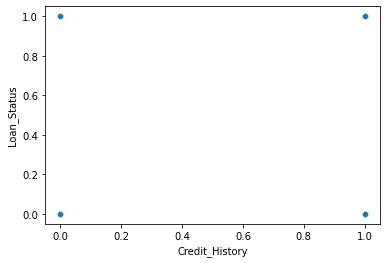

In [27]:
sns.scatterplot(x=df['Credit_History'],y=df['Loan_Status'])
plt.show()

#sns.scatterplot(df['CoapplicantIncome'],df['LoanAmount'])
#plt.show()
#This plot shows that Credit history can be Y, N for Loan Status Y or N. I do not see any correlation

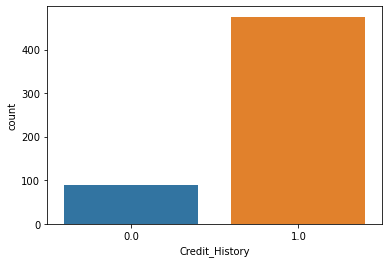

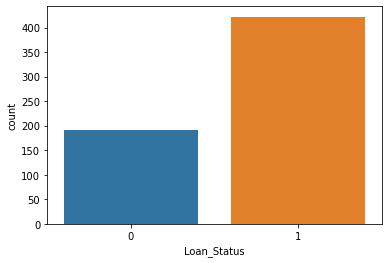

In [28]:
sns.countplot(x=df['Credit_History'])
plt.show()
sns.countplot(x=df['Loan_Status'])
plt.show()


In [29]:
newdf = df.query('Credit_History == 1 & Loan_Status == 1')

In [30]:
newdf.shape
#378/564*100=67% 

(378, 13)

In [31]:
newdf2 = df.query('Credit_History == 0 & Loan_Status == 0')

In [32]:
newdf2.shape
#82/564*100=14.5

(82, 13)

#This shows that If I impute based on Loan Status, I will be able to do it with 80% Accurarcy, will go ahead with this approach

In [33]:
Amount = df.pivot_table(values='Credit_History', index='Loan_Status')

missing_values = df['Credit_History'].isnull()
print('Missing values: %d' %sum(missing_values))

df.loc[missing_values,'Credit_History']  = df.loc[missing_values,'Loan_Status']
print('Missing values after immputation %d' %sum(df['Credit_History'].isnull()))

Missing values: 50
Missing values after immputation 0


In [34]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,5849.0,0.000000,153.048583,360.0,1.0,2,1,5
1,1,1,1,0,0,4583.0,1508.000000,128.000000,360.0,1.0,0,0,5
2,1,1,0,0,1,3000.0,0.000000,66.000000,360.0,1.0,2,1,3
3,1,1,0,1,0,2583.0,2358.000000,120.000000,360.0,1.0,2,1,3
4,1,0,0,0,0,6000.0,0.000000,141.000000,360.0,1.0,2,1,5
5,1,1,2,0,1,5417.0,4196.000000,267.000000,360.0,1.0,2,1,5
6,1,1,0,1,0,2333.0,1516.000000,95.000000,360.0,1.0,2,1,3
7,1,1,3,0,0,3036.0,2504.000000,158.000000,360.0,0.0,1,0,5
8,1,1,2,0,0,4006.0,1526.000000,168.000000,360.0,1.0,2,1,5
9,1,1,1,0,0,12841.0,10968.000000,349.000000,360.0,1.0,1,0,2


##working with Label

In [35]:
df['Loan_Status'].value_counts()
#This count value shows the ata set news balancing
#Will use SMOTE to oversample the lower frequency class


1    422
0    192
Name: Loan_Status, dtype: int64

In [36]:
#Multicollinearity check
x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
 12  TotalIncome        614 non-null    int32  
dtypes: float64(5), int32(3), int64(5)
memory usage: 55.3 KB


In [38]:
#Screwness Correction
from sklearn.preprocessing import power_transform
df6=pd.DataFrame(df['ApplicantIncome'])
df6=power_transform(df6)
df_new=pd.DataFrame(df6,columns=['ApplicantIncome'])
df['ApplicantIncome']=df_new['ApplicantIncome']


In [39]:
from sklearn.preprocessing import power_transform
df6=pd.DataFrame(df['CoapplicantIncome'])
df6=power_transform(df6)
df_new=pd.DataFrame(df6,columns=['CoapplicantIncome'])
df['CoapplicantIncome']=df_new['CoapplicantIncome']

In [40]:
#Screwness Correction
from sklearn.preprocessing import power_transform
df6=pd.DataFrame(df['LoanAmount'])
df6=power_transform(df6)
df_new=pd.DataFrame(df6,columns=['LoanAmount'])
df['LoanAmount']=df_new['LoanAmount']

In [41]:
Numerical_features = df.select_dtypes(include=[np.float64])
Numerical_features.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.018989
Loan_Amount_Term    -2.402112
Credit_History      -1.798506
dtype: float64

In [42]:
#Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)
#Looks good to proceed with these features
#Would proceed wih deleting Loan_Amount_Term


              feature        VIF
0              Gender   6.186327
1             Married   3.733372
2          Dependents   1.787870
3           Education   1.322351
4       Self_Employed   1.176794
5     ApplicantIncome   2.962630
6   CoapplicantIncome   1.479733
7          LoanAmount   6.884542
8    Loan_Amount_Term  12.660675
9      Credit_History   5.425161
10      Property_Area   2.576372
11        TotalIncome   7.022954


In [43]:
df=df.drop(columns=['Loan_Amount_Term'],axis=1)
df=df.drop(columns=['TotalIncome'],axis=1)

In [44]:
x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

#Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

             feature       VIF
0             Gender  4.983266
1            Married  3.887587
2         Dependents  1.801867
3          Education  1.323544
4      Self_Employed  1.185488
5    ApplicantIncome  1.851318
6  CoapplicantIncome  1.506052
7         LoanAmount  1.613760
8     Credit_History  3.801000
9      Property_Area  2.425606


In [45]:
from imblearn.over_sampling import SMOTE
#stategy = {11:510,7:510,6:510,12:510,13:510,14:510,5:510,15:510,16:510,17:510,4:510,18:510,19:510,20:510,21:510,3:510,23:510,22:510}
#510 HERE IMPLIES 75% OF MAJORITY CLASS
oversample=SMOTE(0.8,k_neighbors=5)
x_smoted, y_smoted=oversample.fit_resample(x,y)

# summarize distribution
counter = y_smoted.value_counts()
for k,v in counter.items():
    per = v / len(y_smoted) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
#THE dataSET IS BALANCED NOW, 

Class=1, n=422 (55.599%)
Class=0, n=337 (44.401%)


In [46]:
#Scale the fetures
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_smoted)
x_scaled

array([[ 0.50041169, -1.28241932, -0.70746605, ...,  0.30001987,
         0.56910917,  1.23593994],
       [ 0.50041169,  0.77977615,  0.31144615, ..., -0.06090861,
         0.56910917, -1.26894234],
       [ 0.50041169,  0.77977615, -0.70746605, ..., -1.36624774,
         0.56910917,  1.23593994],
       ...,
       [ 0.50041169,  0.77977615, -0.70746605, ...,  2.79174467,
         0.56910917, -1.26894234],
       [ 0.50041169,  0.77977615, -0.70746605, ...,  0.45264723,
        -1.8190383 , -1.26894234],
       [-1.99835459, -1.28241932,  0.31144615, ..., -1.12219666,
         0.56910917, -1.26894234]])

In [47]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y_smoted,test_size=0.25, random_state=100)

In [48]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.60      0.72        77
           1       0.78      0.96      0.86       113

    accuracy                           0.82       190
   macro avg       0.85      0.78      0.79       190
weighted avg       0.84      0.82      0.81       190



In [49]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        77
           1       0.87      0.91      0.89       113

    accuracy                           0.86       190
   macro avg       0.86      0.85      0.86       190
weighted avg       0.86      0.86      0.86       190



In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71        77
           1       0.79      0.88      0.83       113

    accuracy                           0.78       190
   macro avg       0.78      0.76      0.77       190
weighted avg       0.78      0.78      0.78       190



In [51]:
from sklearn.ensemble import BaggingClassifier
bclf=BaggingClassifier()
bclf.fit(x_train,y_train)
y_pred=bclf.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       113

    accuracy                           0.86       190
   macro avg       0.86      0.86      0.86       190
weighted avg       0.86      0.86      0.86       190



In [52]:
params={'C':[ 1, 3, 5, 7, 8,  12, 15, 18, 20],
   'gamma':[0.1, 0.4, 0.8, 1]}
GSCV=GridSearchCV(svc,params)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'C': 1, 'gamma': 0.4}

In [53]:
from sklearn.svm import SVC
svc=SVC(C=1, gamma=0.1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.60      0.72        77
           1       0.78      0.96      0.86       113

    accuracy                           0.82       190
   macro avg       0.85      0.78      0.79       190
weighted avg       0.84      0.82      0.81       190



In [54]:
# Crossvalidation score also show there is no overfitting isse
from sklearn.model_selection import cross_val_score
CS_svc=cross_val_score(svc,x_scaled,y_smoted,cv=5)
CS_svc.mean()

0.7905629139072848

In [55]:
from sklearn.model_selection import cross_val_score
CS_RF=cross_val_score(RF,x_scaled,y_smoted,cv=5)
CS_RF.mean()

0.8341321017776229

#Will go wih Random Forest


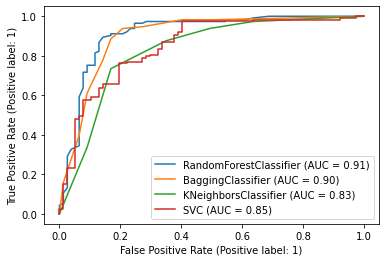

In [56]:
from sklearn.metrics import plot_roc_curve

classifiers = [RF, bclf, knn ,svc ]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax)

In [57]:
with open("RF", "wb") as f:
    pickle.dump(RF, f)